In [68]:
!pip install prophet

     |████████████████████████████████| 8.8 MB 319 kB/s eta 0:00:01
     |████████████████████████████████| 93 kB 376 kB/s eta 0:00:01
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [1]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('train.csv')
df.isna().sum()

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

In [21]:
df

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6
...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


In [7]:
test = pd.read_csv('sample_submission.csv')
test

,일시,평균기온
0,2023-01-01,0
1,2023-01-02,0
2,2023-01-03,0
3,2023-01-04,0
4,2023-01-05,0
...,...,...
353,2023-12-20,0
354,2023-12-21,0
355,2023-12-22,0
356,2023-12-23,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     9150 non-null   float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     22893 non-null  float64
 8   일사합     18149 non-null  float64
 9   일조율     22645 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


In [22]:
df['최고기온'].fillna(method='bfill', inplace=True)  # 뒤의 값으로 대체
df['최저기온'].fillna(method='bfill', inplace=True)
df['일교차'].fillna(method='bfill', inplace=True)
df['강수량'].fillna(method='bfill', inplace=True)
df['평균풍속'].fillna(method='bfill', inplace=True)
df['일조합'].fillna(method='bfill', inplace=True)
df['일사합'].fillna(method='bfill', inplace=True)
df['일조율'].fillna(method='bfill', inplace=True)

In [9]:
df.describe()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
count,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000
mean,17.071257,8.452001,8.619291,7.395932,65.202851,2.380900,5.857694,10.432268,48.326613,12.415419
std,10.714039,10.578244,2.907101,17.261952,14.549077,0.947545,3.815408,6.402752,31.514588,10.489515
min,-13.600000,-20.200000,1.000000,0.000000,17.900000,0.100000,0.000000,0.000000,0.000000,-16.400000
25%,7.800000,-0.300000,6.600000,0.000000,54.900000,1.700000,2.200000,4.810000,18.600000,3.400000
50%,18.900000,9.200000,8.600000,1.000000,65.500000,2.200000,6.600000,9.020000,54.700000,13.800000
75%,26.400000,17.900000,10.600000,6.500000,75.800000,2.900000,9.000000,15.040000,77.750000,21.800000
max,39.600000,30.300000,19.600000,332.800000,99.800000,7.800000,13.700000,33.480000,96.900000,33.700000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'

/Users/saeun/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/saeun/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


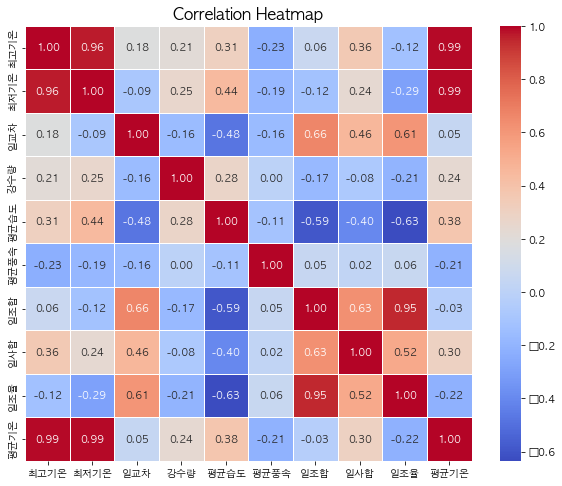

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

/Users/saeun/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


/Users/saeun/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


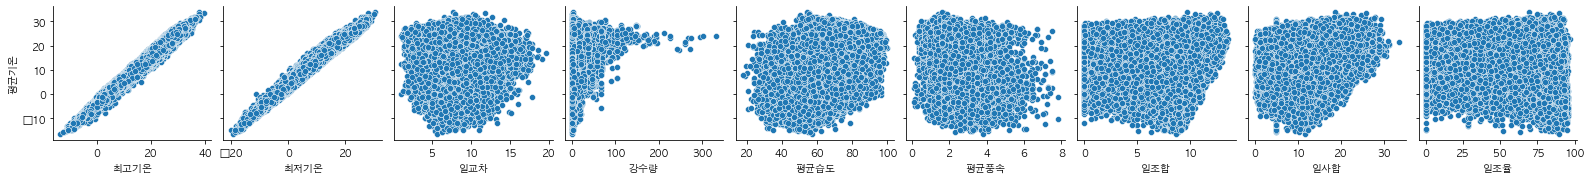

In [179]:
sns.pairplot(df, x_vars=['최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율'], y_vars=['평균기온'])

In [23]:
df['일시'] = pd.to_datetime(df['일시'])

df['월'] = df['일시'].dt.month
df['계절'] = df['월'].apply(lambda x: '봄' if 3 <= x <= 5 else ('여름' if 6 <= x <= 8 else ('가을' if 9 <= x <= 11 else '겨울')))

In [24]:
df = pd.get_dummies(df, columns=['계절'])

In [25]:
start_date = '2014-01-01'
end_date = '2022-12-31'
df = df[(df['일시'] >= start_date) & (df['일시'] <= end_date)]
df.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,월,계절_가을,계절_겨울,계절_봄,계절_여름
19724,2014-01-01,7.9,0.3,7.6,0.0,51.3,3.7,6.4,6.17,66.7,4.0,1,0,1,0,0
19725,2014-01-02,6.2,-1.3,7.5,0.0,35.4,2.0,9.0,9.18,93.8,1.5,1,0,1,0,0
19726,2014-01-03,7.3,-1.1,8.4,0.0,54.4,2.5,2.7,4.69,27.8,2.3,1,0,1,0,0
19727,2014-01-04,5.6,-3.7,9.3,0.0,47.1,2.4,8.7,8.14,89.7,-0.1,1,0,1,0,0
19728,2014-01-05,3.8,-4.3,8.1,0.0,48.4,1.9,8.0,7.08,82.5,-0.8,1,0,1,0,0


In [26]:
df = df.set_index('일시')

# 시계열 데이터의 주기를 지정하는 것 D(day)
df.index.freq = 'D'
df.head()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,월,계절_가을,계절_겨울,계절_봄,계절_여름
일시,,,,,,,,,,,,,,,
2014-01-01,7.9,0.3,7.6,0.0,51.3,3.7,6.4,6.17,66.7,4.0,1,0,1,0,0
2014-01-02,6.2,-1.3,7.5,0.0,35.4,2.0,9.0,9.18,93.8,1.5,1,0,1,0,0
2014-01-03,7.3,-1.1,8.4,0.0,54.4,2.5,2.7,4.69,27.8,2.3,1,0,1,0,0
2014-01-04,5.6,-3.7,9.3,0.0,47.1,2.4,8.7,8.14,89.7,-0.1,1,0,1,0,0
2014-01-05,3.8,-4.3,8.1,0.0,48.4,1.9,8.0,7.08,82.5,-0.8,1,0,1,0,0


In [27]:
train_df = df.reset_index()
train_df.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,월,계절_가을,계절_겨울,계절_봄,계절_여름
0,2014-01-01,7.9,0.3,7.6,0.0,51.3,3.7,6.4,6.17,66.7,4.0,1,0,1,0,0
1,2014-01-02,6.2,-1.3,7.5,0.0,35.4,2.0,9.0,9.18,93.8,1.5,1,0,1,0,0
2,2014-01-03,7.3,-1.1,8.4,0.0,54.4,2.5,2.7,4.69,27.8,2.3,1,0,1,0,0
3,2014-01-04,5.6,-3.7,9.3,0.0,47.1,2.4,8.7,8.14,89.7,-0.1,1,0,1,0,0
4,2014-01-05,3.8,-4.3,8.1,0.0,48.4,1.9,8.0,7.08,82.5,-0.8,1,0,1,0,0


In [154]:
train_df = df.reset_index()
train_df = train_df.rename(columns={'일시': 'ds', '평균기온': 'y'})
train_df

,ds,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,y,월,계절_가을,계절_겨울,계절_봄,계절_여름
0,2014-01-01,7.9,0.3,7.6,0.0,51.3,3.7,6.4,6.17,66.7,4.0,1,0,1,0,0
1,2014-01-02,6.2,-1.3,7.5,0.0,35.4,2.0,9.0,9.18,93.8,1.5,1,0,1,0,0
2,2014-01-03,7.3,-1.1,8.4,0.0,54.4,2.5,2.7,4.69,27.8,2.3,1,0,1,0,0
3,2014-01-04,5.6,-3.7,9.3,0.0,47.1,2.4,8.7,8.14,89.7,-0.1,1,0,1,0,0
4,2014-01-05,3.8,-4.3,8.1,0.0,48.4,1.9,8.0,7.08,82.5,-0.8,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2022-12-27,3.3,-7.3,10.6,0.1,69.8,1.8,8.8,10.25,91.7,-2.6,12,0,1,0,0
3283,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3,12,0,1,0,0
3284,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9,12,0,1,0,0
3285,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8,12,0,1,0,0


In [152]:
!pip install optuna

     |████████████████████████████████| 413 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 5.1 MB/s eta 0:00:011


In [160]:
# 베이지안 최적화
import optuna
from sklearn.metrics import mean_absolute_error
def objective(trial):
    changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 10.0)
    seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 0.01, 10.0)
    holidays_prior_scale = trial.suggest_loguniform('holidays_prior_scale', 0.01, 10.0)
    
    # Prophet 모델 생성
    model = Prophet(changepoint_prior_scale=changepoint_prior_scale,
                    seasonality_prior_scale=seasonality_prior_scale,
                    holidays_prior_scale=holidays_prior_scale)
    
    # 모델 학습
    model.fit(train_df)
    
    # 예측 수행
    future = model.make_future_dataframe(periods=358, freq='d')  # 예측 기간을 설정 (예: 1년)
    forecast = model.predict(future)
    
    # MAE 계산
    y_true = train_df['y'].values
    y_pred = forecast['yhat'][:-358].values  # 예측 기간만큼의 값 사용
    mae = mean_absolute_error(y_true, y_pred)
    
    return mae

# Bayesian 최적화 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# 최적의 하이퍼파라미터 출력
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-01-02 10:53:03,557] A new study created in memory with name: no-name-afa8dc08-a521-47e4-a259-a813925fea69
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 10.0)
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 0.01, 10.0)
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:7: FutureWarning: suggest_loguniform has been de

10:53:13 - cmdstanpy - INFO - Chain [1] start processing
10:53:14 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-02 10:53:15,061] Trial 5 finished with value: 2.3279475012463777 and parameters: {'changepoint_prior_scale': 5.268887094697105, 'seasonality_prior_scale': 8.682059741122414, 'holidays_prior_scale': 0.12364720035337685}. Best is trial 5 with value: 2.3279475012463777.
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 10.0)
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rele

10:53:26 - cmdstanpy - INFO - Chain [1] start processing
10:53:27 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-02 10:53:28,399] Trial 11 finished with value: 2.3285635537890297 and parameters: {'changepoint_prior_scale': 7.69366461652948, 'seasonality_prior_scale': 9.787294549957156, 'holidays_prior_scale': 0.7057002822125166}. Best is trial 5 with value: 2.3279475012463777.
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 10.0)
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/relea

10:53:40 - cmdstanpy - INFO - Chain [1] start processing
10:53:42 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-02 10:53:43,102] Trial 17 finished with value: 2.3279260810118014 and parameters: {'changepoint_prior_scale': 9.703606599632899, 'seasonality_prior_scale': 5.804870537114941, 'holidays_prior_scale': 0.8077788865384818}. Best is trial 17 with value: 2.3279260810118014.
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 10.0)
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

10:53:54 - cmdstanpy - INFO - Chain [1] start processing
10:53:56 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-02 10:53:57,109] Trial 23 finished with value: 2.3298000301431787 and parameters: {'changepoint_prior_scale': 2.214714230069456, 'seasonality_prior_scale': 2.4523754720698387, 'holidays_prior_scale': 0.4748422170837533}. Best is trial 21 with value: 2.3277823385349565.
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 10.0)
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

10:54:09 - cmdstanpy - INFO - Chain [1] start processing
10:54:10 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-02 10:54:11,778] Trial 29 finished with value: 2.330043425336074 and parameters: {'changepoint_prior_scale': 3.0612236987262107, 'seasonality_prior_scale': 5.769367210586364, 'holidays_prior_scale': 3.803682523854803}. Best is trial 21 with value: 2.3277823385349565.
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 10.0)
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rele

10:54:25 - cmdstanpy - INFO - Chain [1] start processing
10:54:26 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-02 10:54:27,443] Trial 35 finished with value: 2.3281090055722378 and parameters: {'changepoint_prior_scale': 5.540407139919894, 'seasonality_prior_scale': 0.029528821536913462, 'holidays_prior_scale': 0.30841001347419383}. Best is trial 21 with value: 2.3277823385349565.
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 10.0)
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

10:54:38 - cmdstanpy - INFO - Chain [1] start processing
10:54:39 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-02 10:54:40,594] Trial 41 finished with value: 2.3290238786236497 and parameters: {'changepoint_prior_scale': 9.240448674680303, 'seasonality_prior_scale': 3.315760500319515, 'holidays_prior_scale': 0.183499957172274}. Best is trial 21 with value: 2.3277823385349565.
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 10.0)
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rele

10:54:53 - cmdstanpy - INFO - Chain [1] start processing
10:54:55 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-02 10:54:55,934] Trial 47 finished with value: 2.3281208885421 and parameters: {'changepoint_prior_scale': 7.029496798383779, 'seasonality_prior_scale': 4.308966450345183, 'holidays_prior_scale': 1.5166620623337357}. Best is trial 44 with value: 2.3274685529022183.
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 10.0)
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releas

10:55:11 - cmdstanpy - INFO - Chain [1] start processing
10:55:13 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-02 10:55:13,932] Trial 53 finished with value: 2.327958301450754 and parameters: {'changepoint_prior_scale': 6.882895355915715, 'seasonality_prior_scale': 6.707044069915001, 'holidays_prior_scale': 0.5203897492702408}. Best is trial 44 with value: 2.3274685529022183.
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 10.0)
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rele

10:55:27 - cmdstanpy - INFO - Chain [1] start processing
10:55:29 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-02 10:55:30,160] Trial 59 finished with value: 2.3282351196733018 and parameters: {'changepoint_prior_scale': 7.727061401852104, 'seasonality_prior_scale': 1.1669153076041794, 'holidays_prior_scale': 0.6661578145034134}. Best is trial 44 with value: 2.3274685529022183.
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 10.0)
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

10:55:43 - cmdstanpy - INFO - Chain [1] start processing
10:55:44 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-02 10:55:45,386] Trial 65 finished with value: 2.329106102563005 and parameters: {'changepoint_prior_scale': 4.5076422644921506, 'seasonality_prior_scale': 2.8621020864391964, 'holidays_prior_scale': 0.045311397158487164}. Best is trial 44 with value: 2.3274685529022183.
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 10.0)
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

10:55:56 - cmdstanpy - INFO - Chain [1] start processing
10:55:58 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-02 10:55:59,613] Trial 71 finished with value: 2.3277582118778275 and parameters: {'changepoint_prior_scale': 7.204081464029, 'seasonality_prior_scale': 6.459331530890467, 'holidays_prior_scale': 0.4714686897382672}. Best is trial 44 with value: 2.3274685529022183.
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 10.0)
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releas

10:56:15 - cmdstanpy - INFO - Chain [1] start processing
10:56:17 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-02 10:56:18,018] Trial 77 finished with value: 2.327897327016703 and parameters: {'changepoint_prior_scale': 4.8088110066734755, 'seasonality_prior_scale': 3.3692263486817913, 'holidays_prior_scale': 1.2023388573608078}. Best is trial 44 with value: 2.3274685529022183.
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 10.0)
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

10:56:31 - cmdstanpy - INFO - Chain [1] start processing
10:56:33 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-02 10:56:34,146] Trial 83 finished with value: 2.3276397851010344 and parameters: {'changepoint_prior_scale': 7.716859970886696, 'seasonality_prior_scale': 0.7580270979011359, 'holidays_prior_scale': 0.7437450118863498}. Best is trial 44 with value: 2.3274685529022183.
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 10.0)
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

10:57:09 - cmdstanpy - INFO - Chain [1] start processing
10:57:10 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-02 10:57:13,111] Trial 89 finished with value: 2.3742984739426047 and parameters: {'changepoint_prior_scale': 0.11520703611963325, 'seasonality_prior_scale': 1.2129206121066678, 'holidays_prior_scale': 0.5508775949548719}. Best is trial 84 with value: 2.327418247857085.
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 10.0)
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

10:57:40 - cmdstanpy - INFO - Chain [1] start processing
10:57:42 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-01-02 10:57:44,667] Trial 95 finished with value: 2.3278239724362564 and parameters: {'changepoint_prior_scale': 6.144543137321672, 'seasonality_prior_scale': 0.7737339054811669, 'holidays_prior_scale': 0.642214029132372}. Best is trial 84 with value: 2.327418247857085.
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 10.0)
/var/folders/_3/ym24pmqd37ddqt3d21dnp8940000gn/T/ipykernel_15841/1775933380.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rele

Best trial:
  Value: 2.327418247857085
  Params: 
    changepoint_prior_scale: 7.925309324952514
    seasonality_prior_scale: 0.7584758482644585
    holidays_prior_scale: 0.5722262269746773


In [163]:
submission = pd.read_csv('sample_submission.csv')
submission['평균기온'] = forecast.yhat[-358:].values

submission.to_csv('submission_bayesian.csv', index=False)

In [117]:
from prophet import Prophet

In [82]:
from sklearn.metrics import mean_absolute_error
from itertools import product

best_params = None
best_mae = float('inf')

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1],
    'seasonality_prior_scale': [0.01, 0.1, 1, 10],
}

for params in product(*param_grid.values()):
    hyperparameters = dict(zip(param_grid.keys(), params))
    model = Prophet(**hyperparameters)
    model.fit(train_df)

    future = model.make_future_dataframe(periods=358, freq='d')
    forecast = model.predict(future)

    y_true = train_df['y'].values
    y_pred = forecast['yhat'][:-358].values
    mae = mean_absolute_error(y_true, y_pred)

    if mae < best_mae:
        best_mae = mae
        best_params = hyperparameters

# 최적 하이퍼파라미터 출력
print("Best Hyperparameters:", best_params)
print("Best MAE:", best_mae)

16:43:51 - cmdstanpy - INFO - Chain [1] start processing
16:43:53 - cmdstanpy - INFO - Chain [1] done processing
16:44:02 - cmdstanpy - INFO - Chain [1] start processing
16:44:03 - cmdstanpy - INFO - Chain [1] done processing
16:44:14 - cmdstanpy - INFO - Chain [1] start processing
16:44:16 - cmdstanpy - INFO - Chain [1] done processing
16:44:25 - cmdstanpy - INFO - Chain [1] start processing
16:44:26 - cmdstanpy - INFO - Chain [1] done processing
16:44:35 - cmdstanpy - INFO - Chain [1] start processing
16:44:38 - cmdstanpy - INFO - Chain [1] done processing
16:44:47 - cmdstanpy - INFO - Chain [1] start processing
16:44:50 - cmdstanpy - INFO - Chain [1] done processing
16:45:02 - cmdstanpy - INFO - Chain [1] start processing
16:45:06 - cmdstanpy - INFO - Chain [1] done processing
16:45:17 - cmdstanpy - INFO - Chain [1] start processing
16:45:20 - cmdstanpy - INFO - Chain [1] done processing
16:45:31 - cmdstanpy - INFO - Chain [1] start processing
16:45:41 - cmdstanpy - INFO - Chain [1]

Best Hyperparameters: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1}
Best MAE: 2.4423615705925004


In [83]:
prophet = Prophet(changepoint_prior_scale=0.1, seasonality_prior_scale=1)
prophet.fit(train_df)

16:47:30 - cmdstanpy - INFO - Chain [1] start processing
16:47:39 - cmdstanpy - INFO - Chain [1] done processing


In [84]:
future_data = prophet.make_future_dataframe(periods = 358, freq = 'd') #periods는 예측할 기간
forecast_data = prophet.predict(future_data)

In [85]:
forecast_data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,12.119261,-6.470838,1.503771,12.119261,12.119261,-14.660705,-14.660705,-14.660705,0.002677,0.002677,0.002677,-14.663381,-14.663381,-14.663381,0.0,0.0,0.0,-2.541443
1,1960-01-02,12.119046,-6.420661,1.729370,12.119046,12.119046,-14.682256,-14.682256,-14.682256,0.068902,0.068902,0.068902,-14.751159,-14.751159,-14.751159,0.0,0.0,0.0,-2.563210
2,1960-01-03,12.118831,-6.655311,1.415257,12.118831,12.118831,-14.825080,-14.825080,-14.825080,0.008570,0.008570,0.008570,-14.833650,-14.833650,-14.833650,0.0,0.0,0.0,-2.706249
3,1960-01-04,12.118616,-6.747972,1.043251,12.118616,12.118616,-14.917541,-14.917541,-14.917541,-0.006807,-0.006807,-0.006807,-14.910734,-14.910734,-14.910734,0.0,0.0,0.0,-2.798925
4,1960-01-05,12.118401,-7.368428,0.920749,12.118401,12.118401,-15.024238,-15.024238,-15.024238,-0.041928,-0.041928,-0.041928,-14.982311,-14.982311,-14.982311,0.0,0.0,0.0,-2.905838


In [86]:
submission = pd.read_csv('sample_submission.csv')
submission['평균기온'] = forecast_data.yhat[-358:].values

In [87]:
submission.to_csv('submission.csv', index=False)

In [17]:
# from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
# df['item_id'] = 'time'
# df.rename(columns={'일시':'timestamp'}, inplace=True)

# data = TimeSeriesDataFrame(df)
# predictor = TimeSeriesPredictor( 
#     prediction_length=28,
#     target="평균기온",
#     eval_metric="RMSE",
# )
# # seed 고정
# predictor.fit(data)

In [88]:
submission

,일시,평균기온
0,2023-01-01,-1.017335
1,2023-01-02,-1.118946
2,2023-01-03,-1.234983
3,2023-01-04,-1.299982
4,2023-01-05,-1.338458
...,...,...
353,2023-12-20,0.454078
354,2023-12-21,0.347048
355,2023-12-22,0.214763
356,2023-12-23,0.149669


In [165]:
# train data
# 날짜 데이터
date_data = pd.date_range(start='1960-01-01', end='2022-12-31', freq='D')

# 일 단위 추출
day_of_year = date_data.dayofyear

# # 주기 함수로 변환
# df['Day sin'] = np.sin(2 * np.pi * day_of_year / 365)
# df['Day cos'] = np.cos(2 * np.pi * day_of_year / 365)

# # sample submission data
# # 날짜 데이터
# date_data = pd.date_range(start='2023-01-01', end='2023-12-24', freq='D')

# # 일 단위 추출
# day_of_year = date_data.dayofyear

# # 주기 함수로 변환
# sample['Day sin'] = np.sin(2 * np.pi * day_of_year / 365)
# sample['Day cos'] = np.cos(2 * np.pi * day_of_year / 365)



In [166]:
date_data

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=23011, freq='D')

In [167]:
day_of_year

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            356, 357, 358, 359, 360, 361, 362, 363, 364, 365],
           dtype='int64', length=23011)

In [168]:
np.sin(2 * np.pi * day_of_year / 365)

Float64Index([ 0.017213356155834685,   0.03442161162274574,
               0.051619667223253764,   0.06880242680231986,
                0.08596479873744647,   0.10310169744743485,
                 0.1202080448993527,   0.13727877211326478,
                0.15430882066428117,    0.1712931441814776,
              ...
               -0.15430882066428103,   -0.1372787721132652,
               -0.12020804489935276,  -0.10310169744743544,
               -0.08596479873744671,  -0.06880242680232064,
               -0.05161966722325417, -0.034421611622745804,
              -0.017213356155835285, 6.432490598706546e-16],
             dtype='float64', length=23011)

In [169]:
np.cos(2 * np.pi * day_of_year / 365)

Float64Index([0.9998518392091162, 0.9994074007397048,  0.998666816288476,
              0.9976303053065857, 0.9962981749346078, 0.9946708199115211,
              0.9927487224577402, 0.9905324521322229, 0.9880226656636976,
              0.9852201067560606,
              ...
              0.9880226656636976, 0.9905324521322227, 0.9927487224577402,
              0.9946708199115211, 0.9962981749346077, 0.9976303053065857,
              0.9986668162884759, 0.9994074007397048, 0.9998518392091162,
                             1.0],
             dtype='float64', length=23011)